# Logistic regression with SGD optimizer

## Steps:
<ol>
 <li>Load data</li>
 <li>Clean sentences and tokenize</li>
 <li>Build Vocab</li>
 <li>Convert to bag of words</li>
 <li>Train the model</li>
</ol>

In [1]:
import numpy as np 
import pandas as pd
from nltk.corpus import stopwords
from collections import Counter
import re
import matplotlib.pyplot as plt

In [2]:
# Load training and testing data
train_df = pd.read_csv('simple_IMBD_dataset/Train.csv')
test_df = pd.read_csv('simple_IMBD_dataset/Test.csv')

In [3]:
print(train_df.head(1))
print(test_df.head(1))

                                                text  label
0  I grew up (b. 1965) watching and loving the Th...      0
                                                text  label
0  I always wrote this series off as being a comp...      0


In [4]:
# Extract features from the df
x_train = train_df['text'].values  
y_train = train_df['label'].values 
x_test = test_df['text'].values  
y_test = test_df['label'].values  

print(f'shape of train data is {x_train.shape}')
print(f'shape of test data is {x_test.shape}')

shape of train data is (40000,)
shape of test data is (5000,)


In [5]:
#clean text and tokenize
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text.split()

In [6]:
#Build vocabulary based 
def build_vocab(texts, vocab_size):
    counter = Counter()
    for text in texts:
        words = preprocess(text)
        counter.update(words)
        
    most_common = counter.most_common(vocab_size)
    vocab = {word: idx for idx, (word, _) in enumerate(most_common)}
    return {word: i for i, word in enumerate(vocab)}

In [7]:
#convert text to BoW 
def text_to_Bow(text, vocab):
    bow = np.zeros(len(vocab))
    word_counts = Counter(preprocess(text))
    for word, count in word_counts.items():
        if word in vocab:
            bow[vocab[word]] = count
    return bow

In [8]:
vocab = build_vocab(x_train, vocab_size=10_000)
X_train = np.array([text_to_Bow(text, vocab) for text in x_train])
X_test = np.array([text_to_Bow(text, vocab) for text in x_test])

In [9]:
print(f'X_train: {X_train}')
print(f'X_test: {X_test}')

X_train: [[ 7.  3.  5. ...  0.  0.  0.]
 [20.  7. 14. ...  0.  0.  0.]
 [10.  5.  6. ...  0.  0.  0.]
 ...
 [ 8. 10.  3. ...  0.  0.  0.]
 [15.  8.  5. ...  0.  0.  0.]
 [ 8.  6.  6. ...  0.  0.  0.]]
X_test: [[19.  9. 11. ...  0.  0.  0.]
 [ 8.  3.  3. ...  0.  0.  0.]
 [17.  9.  4. ...  0.  0.  0.]
 ...
 [ 6.  2.  1. ...  0.  0.  0.]
 [ 5. 10.  2. ...  0.  0.  0.]
 [ 5.  3.  5. ...  0.  0.  0.]]


In [10]:
X_train.shape

(40000, 10000)

In [11]:
class LogisticRegressionSGD:
    def __init__(self, learning_rate=0.01, epochs=10):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0
        self.loss_history = []
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def train(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)

        for epoch in range(self.epochs):
            epoch_loss = 0  
            for i in range(num_samples):
                xi = X[i]
                yi = y[i]
                linear_output = np.dot(xi, self.weights) + self.bias
                prediction = self.sigmoid(linear_output)

                # Compute gradients
                error = prediction - yi
                self.weights -= self.learning_rate * error * xi
                self.bias -= self.learning_rate * error  # Update bias

                # Calculate loss for this sample and add to epoch_loss
                epsilon = 1e-10
                sample_loss = - (yi * np.log(prediction + epsilon) + (1 - yi) * np.log(1 - prediction + epsilon))
                epoch_loss += sample_loss

            # Average loss over the samples in the epoch
            epoch_loss /= num_samples
            self.loss_history.append(epoch_loss)
            print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}')

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return (self.sigmoid(linear_output) >= 0.5).astype(int)

In [12]:
# Train model
model = LogisticRegressionSGD(learning_rate=0.01, epochs=50)
model.train(X_train, y_train)

Epoch 1, Loss: 0.9230
Epoch 2, Loss: 0.6621
Epoch 3, Loss: 0.5649
Epoch 4, Loss: 0.4954
Epoch 5, Loss: 0.4647
Epoch 6, Loss: 0.4213
Epoch 7, Loss: 0.4079
Epoch 8, Loss: 0.3769
Epoch 9, Loss: 0.3595
Epoch 10, Loss: 0.3388
Epoch 11, Loss: 0.3265
Epoch 12, Loss: 0.3150
Epoch 13, Loss: 0.3083
Epoch 14, Loss: 0.2893
Epoch 15, Loss: 0.2802
Epoch 16, Loss: 0.2749
Epoch 17, Loss: 0.2674
Epoch 18, Loss: 0.2702
Epoch 19, Loss: 0.2606
Epoch 20, Loss: 0.2506
Epoch 21, Loss: 0.2420
Epoch 22, Loss: 0.2357
Epoch 23, Loss: 0.2277
Epoch 24, Loss: 0.2228
Epoch 25, Loss: 0.2261
Epoch 26, Loss: 0.2250
Epoch 27, Loss: 0.2107
Epoch 28, Loss: 0.2074
Epoch 29, Loss: 0.2088
Epoch 30, Loss: 0.2060
Epoch 31, Loss: 0.1960
Epoch 32, Loss: 0.1979
Epoch 33, Loss: 0.1900
Epoch 34, Loss: 0.1883
Epoch 35, Loss: 0.1902
Epoch 36, Loss: 0.1878
Epoch 37, Loss: 0.1861
Epoch 38, Loss: 0.1837
Epoch 39, Loss: 0.1827
Epoch 40, Loss: 0.1706
Epoch 41, Loss: 0.1706
Epoch 42, Loss: 0.1703
Epoch 43, Loss: 0.1733
Epoch 44, Loss: 0.16

In [13]:
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8542


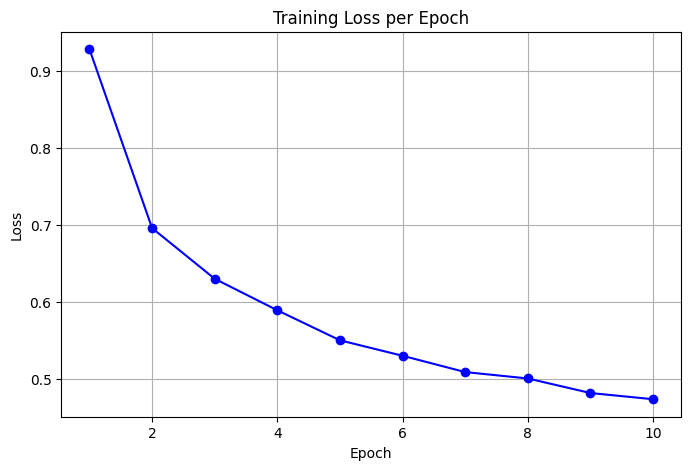

In [34]:
# Plot training loss over epochs
plt.figure(figsize=(8, 5))
plt.plot(range(1, model.epochs + 1), model.loss_history, marker='o', linestyle='-', color='b')
plt.title('Training Loss per Epoch, Epoch=10')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

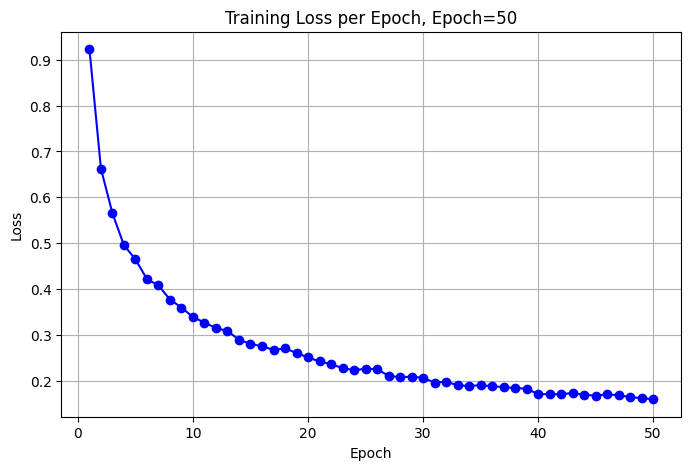

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, model.epochs + 1), model.loss_history, marker='o', linestyle='-', color='b')
plt.title('Training Loss per Epoch, Epoch=50')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [17]:
print("Snippet of the Bag-of-Words matrix (first 5 samples, first 10 features):")
print(X_train[:5, :10])

Snippet of the Bag-of-Words matrix (first 5 samples, first 10 features):
[[ 7.  3.  5.  5.  3.  0.  1.  1.  3.  0.]
 [20.  7. 14.  8.  5.  4.  4.  3. 10.  6.]
 [10.  5.  6.  0. 10.  1.  2.  0.  1.  3.]
 [ 7.  3.  1.  2.  1.  4.  2.  0.  3.  1.]
 [13.  9.  7.  6.  1.  3.  3.  2.  3.  1.]]
